In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [26]:
# Step 1: Generate dataset (last two digits of ID = 11 → k=11 → k%5=1)
np.random.seed(11)  # for reproducibility
data = 60 + np.random.randint(0, 15, size=12) + (11 % 5)

In [27]:
# Step 2: Define hypothesis
population_mean = 65  # H₀: μ = 65, H₁: μ ≠ 65

In [28]:
# Step 3: Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, population_mean)

In [29]:
# Step 4: Compute 95% confidence interval
ci = stats.t.interval(
    0.95, df=len(data)-1,
    loc=np.mean(data),
    scale=stats.sem(data)
)

In [30]:
# Step 5: Display results
print("Dataset:", data)
print(f"Sample Mean: {np.mean(data):.2f}")
print(f"Hypothesized Mean: {population_mean}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {len(data)-1}")
print(f"p-Value: {p_value:.4f}")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")

Dataset: [70 61 72 62 68 74 73 62 68 63 69 74]
Sample Mean: 68.00
Hypothesized Mean: 65
t-Statistic: 2.12
Degrees of Freedom: 11
p-Value: 0.0574
95% Confidence Interval: [64.89, 71.11]


In [31]:
# Step 6: Conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀: The sample mean is significantly different from {population_mean}.")
else:
    print(f"Fail to Reject H₀: The sample mean is not significantly different from {population_mean}.")

Fail to Reject H₀: The sample mean is not significantly different from 65.


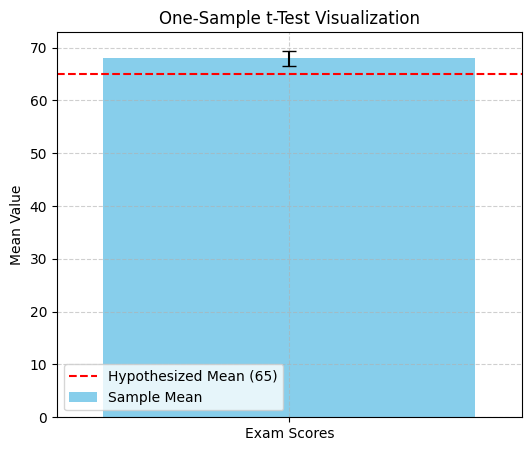

In [32]:
# Step 7: Visualization
plt.figure(figsize=(6,5))
plt.bar(1, np.mean(data), color="skyblue", label='Sample Mean')
plt.errorbar(1, np.mean(data), yerr=stats.sem(data), fmt='k', capsize=5, linewidth=1.5)
plt.axhline(y=population_mean, color='r', linestyle='--', linewidth=1.5, label='Hypothesized Mean (65)')
plt.title('One-Sample t-Test Visualization')
plt.xlim(0.5,1.5)
plt.xticks([1], ["Exam Scores"])
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()